In [3]:
import pandas as pd

In [4]:
pd.__version__


'0.23.0'

In [5]:
metadata=pd.read_csv("D:/Data Science/POC/Topic Modelling/Hotel Reviews/515k-hotel-reviews-data-in-europe/Hotel_Reviews.csv", engine='python')

In [6]:
metadata.head(3)

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968


In [7]:
metadata['Negative_Review'].head(5)

0     I am so angry that i made this post available...
1                                          No Negative
2     Rooms are nice but for elderly a bit difficul...
3     My room was dirty and I was afraid to walk ba...
4     You When I booked with your company on line y...
Name: Negative_Review, dtype: object

In [8]:
metadata['Negative_Review'] = metadata['Negative_Review'].fillna('')

In [9]:
metadata['Negative_Review'].head(10)

0     I am so angry that i made this post available...
1                                          No Negative
2     Rooms are nice but for elderly a bit difficul...
3     My room was dirty and I was afraid to walk ba...
4     You When I booked with your company on line y...
5     Backyard of the hotel is total mess shouldn t...
6     Cleaner did not change our sheet and duvet ev...
7     Apart from the price for the brekfast Everyth...
8     Even though the pictures show very clean room...
9     The aircondition makes so much noise and its ...
Name: Negative_Review, dtype: object

In [10]:
No_of_seleced_doc=3000

In [11]:
df1=metadata['Negative_Review'].iloc[0:No_of_seleced_doc]

In [12]:
df1.head(20)

0      I am so angry that i made this post available...
1                                           No Negative
2      Rooms are nice but for elderly a bit difficul...
3      My room was dirty and I was afraid to walk ba...
4      You When I booked with your company on line y...
5      Backyard of the hotel is total mess shouldn t...
6      Cleaner did not change our sheet and duvet ev...
7      Apart from the price for the brekfast Everyth...
8      Even though the pictures show very clean room...
9      The aircondition makes so much noise and its ...
10                                   Nothing all great 
11     6 30 AM started big noise workers loading woo...
12     The floor in my room was filfy dirty Very bas...
13                                          No Negative
14     The staff in the restaurant could of been mor...
15                                          No Negative
16     Very steep steps in room up to the bed not sa...
17     We did not like the fact that breakfast w

In [13]:
df1.shape


(3000,)

In [14]:
print("There are {} review comment from {} different nationality, such as {}... \n".format(df1.shape[0],len(metadata.Reviewer_Nationality.unique()),", ".join(metadata.Reviewer_Nationality.unique()[0:5])))

There are 3000 review comment from 227 different nationality, such as  Russia ,  Ireland ,  Australia ,  United Kingdom ,  New Zealand ... 



In [15]:
Nationality=metadata[["Reviewer_Score","Reviewer_Nationality","Negative_Review"]].iloc[0:No_of_seleced_doc].groupby("Reviewer_Nationality")

In [16]:
Nationality.describe().head(10)

Reviewer_Score                                        \
                              count      mean       std  min    25%   50%   
Reviewer_Nationality                                                        
                                1.0  7.900000       NaN  7.9  7.900  7.90   
 Abkhazia Georgia               2.0  5.650000  2.616295  3.8  4.725  5.65   
 Albania                        2.0  5.600000  1.555635  4.5  5.050  5.60   
 Argentina                      4.0  8.975000  1.102648  7.5  8.475  9.20   
 Australia                    132.0  8.275758  1.766530  2.9  7.100  8.80   
 Austria                       12.0  8.241667  1.352075  5.4  7.400  8.55   
 Azerbaijan                     1.0  7.500000       NaN  7.5  7.500  7.50   
 Bahrain                        7.0  7.985714  1.754450  4.2  8.100  8.30   
 Belarus                        1.0  7.900000       NaN  7.9  7.900  7.90   
 Belgium                       26.0  8.376923  1.840936  3.8  6.800  9.20   

                                    
                         75%   max  
Reviewer_Nationality                
                       7.900   7.9  
 Abkhazia Georgia      6.575   7.5  
 Albania               6.150   6.7  
 Argentina             9.700  10.0  
 Australia            10.000  10.0  
 Austria               9.300  10.0  
 Azerbaijan            7.500   7.5  
 Bahrain               8.800   9.6  
 Belarus               7.900   7.9  
 Belgium               9.900  10.0

In [17]:
Nationality.mean().sort_values(by="Reviewer_Score",ascending=False).head(10)

,Reviewer_Score
Reviewer_Nationality,
Uruguay,10.000000
Liechtenstein,10.000000
United States Minor Outlying Islands,10.000000
Panama,10.000000
Morocco,10.000000
Slovakia,9.733333
Namibia,9.600000
Latvia,9.600000
Indonesia,9.600000


In [18]:
import matplotlib.pyplot as plt
% matplotlib inline

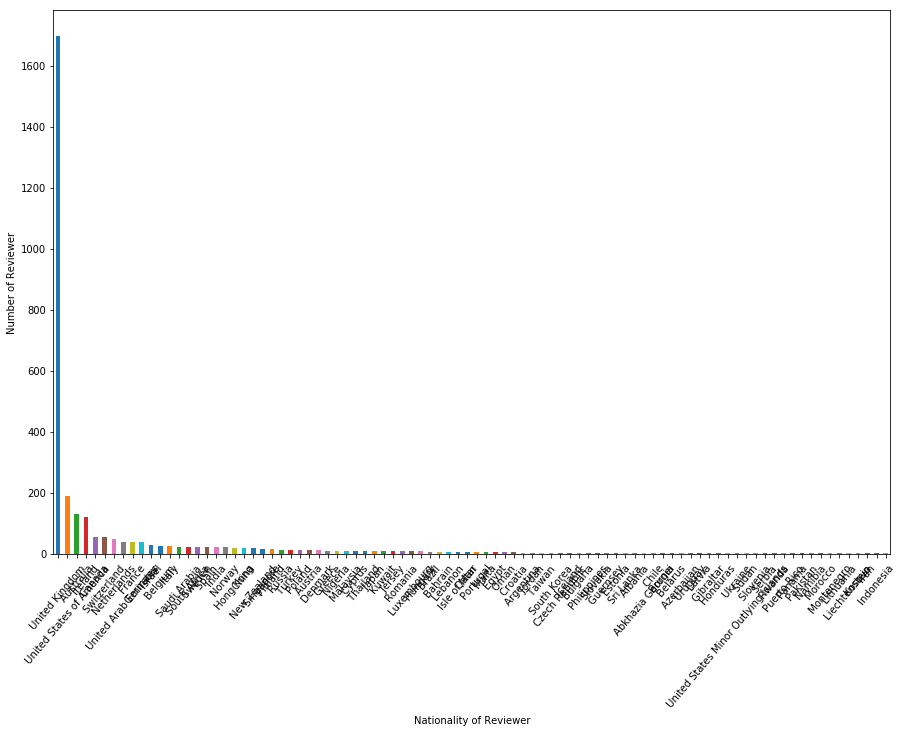

In [19]:
plt.figure(figsize=(15,10))
Nationality.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Nationality of Reviewer")
plt.ylabel("Number of Reviewer")
plt.show()

In [20]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [21]:
text = " ".join(review for review in metadata['Negative_Review'])
print ("There are {} words in the combination of all review.".format(len(text)))


There are 48891016 words in the combination of all review.


In [22]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["Nan","Negative","etc"])

In [23]:
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=100).generate(text)

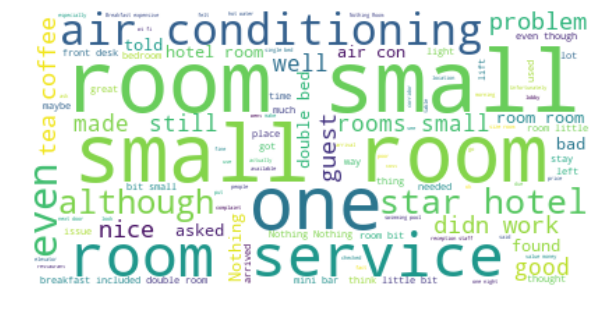

In [24]:
# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [1]:
import os
!pip install gensim
import gensim

  Running setup.py bdist_wheel for smart-open: started
  Running setup.py bdist_wheel for smart-open: finished with status 'done'
  Stored in directory: C:\Users\anshuman_mahapatra\AppData\Local\pip\Cache\wheels\73\f1\9b\ccf93d4ba073b6f79b1ed9df68ab5ce048d8136d0efcf90b30
  Running setup.py bdist_wheel for bz2file: started
  Running setup.py bdist_wheel for bz2file: finished with status 'done'
  Stored in directory: C:\Users\anshuman_mahapatra\AppData\Local\pip\Cache\wheels\81\75\d6\e1317bf09bf1af5a30befc2a007869fa6e1f516b8f7c591cb9
Successfully built smart-open bz2file


distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.
C:\Users\anshuman_mahapatra\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\utils.py:1209: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [25]:
# Save the image in the img folder:
wordcloud.to_file("D:/Data Science/POC/Topic Modelling/Hotel Reviews/515k-hotel-reviews-data-in-europe/first_review.png")

In [26]:
##preprocessing of text using gensim
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

In [27]:
data_words = list(sent_to_words(df1))

In [28]:
print(data_words[:1])

[['am', 'so', 'angry', 'that', 'made', 'this', 'post', 'available', 'via', 'all', 'possible', 'sites', 'use', 'when', 'planing', 'my', 'trips', 'so', 'no', 'one', 'will', 'make', 'the', 'mistake', 'of', 'booking', 'this', 'place', 'made', 'my', 'booking', 'via', 'booking', 'com', 'we', 'stayed', 'for', 'nights', 'in', 'this', 'hotel', 'from', 'to', 'july', 'upon', 'arrival', 'we', 'were', 'placed', 'in', 'small', 'room', 'on', 'the', 'nd', 'floor', 'of', 'the', 'hotel', 'it', 'turned', 'out', 'that', 'this', 'was', 'not', 'the', 'room', 'we', 'booked', 'had', 'specially', 'reserved', 'the', 'level', 'duplex', 'room', 'so', 'that', 'we', 'would', 'have', 'big', 'windows', 'and', 'high', 'ceilings', 'the', 'room', 'itself', 'was', 'ok', 'if', 'you', 'don', 'mind', 'the', 'broken', 'window', 'that', 'can', 'not', 'be', 'closed', 'hello', 'rain', 'and', 'mini', 'fridge', 'that', 'contained', 'some', 'sort', 'of', 'bio', 'weapon', 'at', 'least', 'guessed', 'so', 'by', 'the', 'smell', 'of', 

In [34]:
!pip install spacy


  Using cached https://files.pythonhosted.org/packages/24/de/ac14cd453c98656d6738a5669f96a4ac7f668493d5e6b78227ac933c5fd4/spacy-2.0.12.tar.gz
  Using cached https://files.pythonhosted.org/packages/5e/31/c8c1ecafa44db30579c8c457ac7a0f819e8b1dbc3e58308394fff5ff9ba7/murmurhash-0.28.0.tar.gz
  Using cached https://files.pythonhosted.org/packages/f8/9e/273fbea507de99166c11cd0cb3fde1ac01b5bc724d9a407a2f927ede91a1/cymem-1.31.2.tar.gz
  Using cached https://files.pythonhosted.org/packages/be/fc/09684555ce0ee7086675e6be698e4efeb6d9b315fd5aa96bed347572282b/preshed-1.0.1.tar.gz
  Using cached https://files.pythonhosted.org/packages/94/b1/47a88072d0a38b3594c0a638a62f9ef7c742b8b8a87f7b105f7ed720b14b/thinc-6.10.3.tar.gz
  Using cached https://files.pythonhosted.org/packages/9e/9b/62c60d2f5bc135d2aa1d8c8a86aaf84edb719a59c7f11a4316259e61a298/plac-0.9.6-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/16/c4/79f3409bc710559015464e5f49b9879430d8f87498ecdc335899732e5377/ujson-1.

  Failed building wheel for spacy
  Failed building wheel for murmurhash
  Failed building wheel for cymem
  Failed building wheel for preshed
  Failed building wheel for thinc
  Failed building wheel for ujson
Command "C:\Users\anshuman_mahapatra\AppData\Local\Continuum\anaconda3\python.exe -u -c "import setuptools, tokenize;__file__='C:\\Users\\anshuman_mahapatra\\AppData\\Local\\Temp\\pip-install-6_ce63we\\murmurhash\\setup.py';f=getattr(tokenize, 'open', open)(__file__);code=f.read().replace('\r\n', '\n');f.close();exec(compile(code, __file__, 'exec'))" install --record C:\Users\anshuman_mahapatra\AppData\Local\Temp\pip-record-nuzm4y42\install-record.txt --single-version-externally-managed --compile" failed with error code 1 in C:\Users\anshuman_mahapatra\AppData\Local\Temp\pip-install-6_ce63we\murmurhash\
You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [43]:
import re, nltk, spacy
##nlp = spacy.load('en', disable=['parser', 'ner'])


OSError: [E050] Can't find model 'en'. It doesn't seem to be a shortcut link, a Python package or a valid path to a data directory.

In [48]:

import spacy
import en_core_web_sm
nlp = en_core_web_sm.load('en', disable=['parser', 'ner'])

TypeError: load() takes 0 positional arguments but 1 was given

In [46]:
# Do lemmatization keeping only Noun, Adj, Verb, Adverb
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append(" ".join([token.lemma_ if token.lemma_ not in ['-PRON-'] else '' for token in doc if token.pos_ in allowed_postags]))
    return texts_out

In [47]:
data_lemmatized = lemmatization(data_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

IndexError: list index out of range